In [17]:
%matplotlib inline
%load_ext autoreload
%autoreload

import os, sys
parentdir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parentdir)

from quanty.model import backtester as q
from quanty.model import backtester_base as q_base
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
db = dm.read_db(base='global_20210331.pkl', add=[])
db_kr = dm.read_db(base='kr_20210331.pkl', add=[])
start = '2010-12-31'
end = '2021-03-31'

# Global sector model

In [3]:
gsam = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    n_picks=20, 
    assets=setting.assets_global_sector, 
    sig_w_base=[1,0,0,0,0,0,0,0,0,0,0,0], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='ACWI', 
    cash_equiv='ACWI', #'BND_US_Tbill', 
    start=start, 
    end=end 
)

  0%|          | 0/124 [00:00<?, ?it/s]

3.3732080459594727


<Figure size 432x288 with 0 Axes>

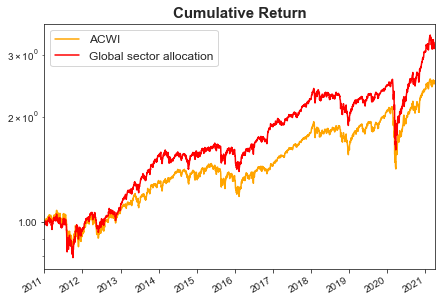

In [4]:
strats = ['ACWI', 'DualMomentum']
names = ['ACWI', 'Global sector allocation']
color = ['orange', 'r']

gsam.plot_cum(strats, names=names, color=color, logy=True);

In [5]:
gsam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Semiconductor,8.42,2579,22.95,26.72,0.86,-34.25,26.54,22.65,1.11,1.24,18.58,61.48,1.40,88.91
BDC,2.15,2579,7.69,22.02,0.35,-55.44,5.73,12.96,0.46,0.84,36.09,61.48,0.99,66.65
Bank,2.47,2579,9.15,27.79,0.33,-53.14,8.65,19.82,0.46,1.21,34.85,61.48,0.94,69.10
GoldMiner,0.55,2579,-5.58,39.55,-0.14,-80.57,-7.02,38.09,-0.23,0.49,59.83,50.00,1.03,-25.66
DualMomentum,3.19,2579,11.90,17.88,0.67,-37.07,12.41,13.85,0.75,0.97,20.30,66.39,0.98,91.86


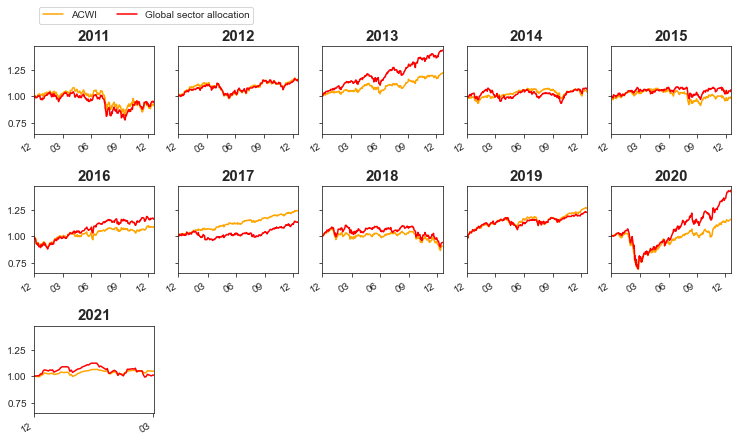

In [12]:
gsam.plot_cum_yearly(strats, names=names, color=color);#, remove=range(2003,2016));

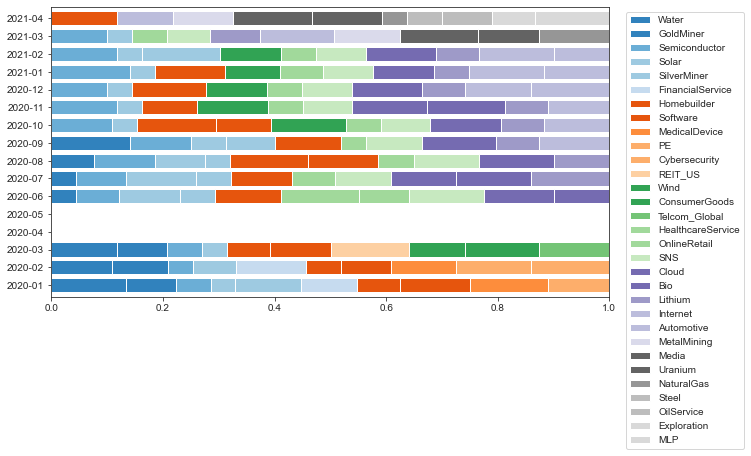

In [13]:
gsam.plot_weight([2020, 2021]);

In [10]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

Solar            0.119299
Semiconductor    0.266760
Lithium          0.206631
SNS              0.238597
OnlineRetail     0.168714
Name: 2020-11-27 00:00:00, dtype: float64

In [45]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

Solar           0.119299
Lithium         0.168714
OnlineRetail    0.206631
Wind            0.266760
SNS             0.238597
Name: 2020-12-30 00:00:00, dtype: float64

In [39]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

Solar           0.119299
Lithium         0.206631
Automotive      0.266760
SNS             0.238597
OnlineRetail    0.168714
Name: 2021-01-29 00:00:00, dtype: float64

In [47]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

Solar            0.074197
Wind             0.181746
Lithium          0.128514
Automotive       0.165910
Semiconductor    0.196308
SNS              0.148395
OnlineRetail     0.104931
Name: 2021-01-29 00:00:00, dtype: float64

In [13]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

Lithium          0.238597
SNS              0.206631
Semiconductor    0.266760
OnlineRetail     0.168714
Solar            0.119299
Name: 2021-02-26 00:00:00, dtype: float64

In [8]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

Steel          0.168714
OilService     0.238597
Exploration    0.206631
Automotive     0.266760
NaturalGas     0.119299
Name: 2021-03-30 00:00:00, dtype: float64

In [14]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

Steel          0.062943
MetalMining    0.109020
OilService     0.089014
Media          0.140744
Homebuilder    0.117755
Uranium        0.125885
Exploration    0.077089
MLP            0.133522
Automotive     0.099521
NaturalGas     0.044507
Name: 2021-03-30 00:00:00, dtype: float64

In [6]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

OilService        0.032433
PE                0.068800
Uranium           0.045867
RegionalBank      0.056175
NaturalGas        0.016216
Timber            0.072522
MetalMining       0.039722
Steel             0.022933
Media             0.051281
Gaming            0.053784
Airlines          0.066862
Homebuilder       0.042905
CapitalMarket     0.070686
Transportation    0.064866
Exploration       0.028088
Automotive        0.036261
REIT_US_Mort      0.062806
MLP               0.048649
BDC               0.060676
Bank              0.058469
Name: 2021-03-30 00:00:00, dtype: float64

# US factor model

In [15]:
ufam = q.Backtester(
    setting.base_params(db), 
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    freq='M',
    assets=setting.assets_test_2, 
    sig_w_base=[1,0,0,0,0,0,0,0,0,0,0,0], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_n_sample= 21*6, 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    #follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='US', 
    supporter='US', #'BND_US_Long', 
    cash_equiv='US', #'BND_US_Tbill', 
    start=start, 
    end=end 
)

  0%|          | 0/124 [00:00<?, ?it/s]

2.590527057647705


<Figure size 432x288 with 0 Axes>

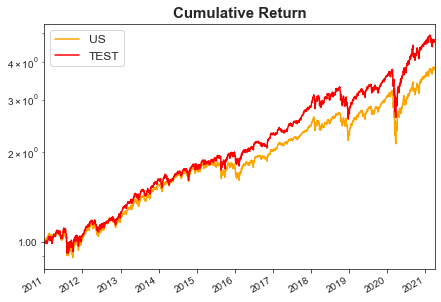

In [16]:
strats = ['US', 'DualMomentum']
names = ['US', 'TEST']
color = ['orange', 'r']

ufam.plot_cum(strats, names=names, color=color, logy=True);

In [17]:
ufam.get_stats()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Growth,4.56,2579,15.85,17.70,0.90,-31.35,16.65,13.88,1.10,0.95,4.29,66.39,1.24,97.58
Quality,3.97,2579,14.31,16.91,0.85,-34.06,14.08,12.67,1.01,0.92,4.33,68.03,1.12,97.51
US,3.84,2579,13.95,17.09,0.82,-33.72,15.13,12.99,1.08,0.95,6.61,71.31,0.92,97.13
Value,3.04,2579,11.37,17.57,0.65,-37.04,10.74,13.40,0.88,0.95,16.57,67.21,0.94,92.90
ACWI,2.52,2579,9.40,17.46,0.54,-33.53,10.55,13.90,0.65,1.00,22.06,65.57,0.94,90.86
Momentum,4.70,2579,16.19,18.54,0.87,-34.08,16.91,14.48,1.17,0.94,3.26,66.39,1.28,98.00
DualMomentum,4.73,2579,16.27,17.79,0.91,-31.02,16.32,14.46,1.10,0.94,3.35,64.75,1.36,97.99


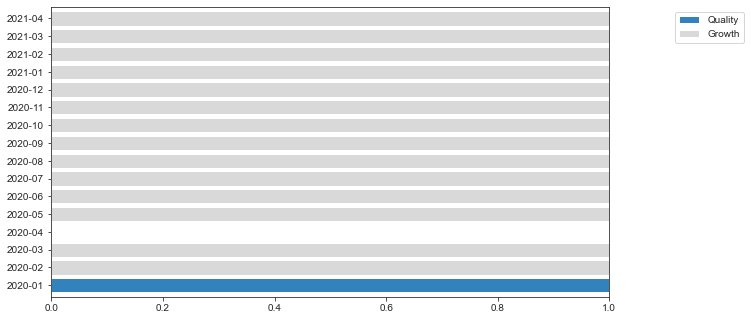

In [18]:
ufam.plot_weight([2020,2021]);

In [19]:
ufam.weight.iloc[-1][ufam.weight.iloc[-1]>0]

Growth    1.0
Name: 2021-03-30 00:00:00, dtype: float64

### Quality 기본 + 낙폭과대

In [20]:
ufam = q.Backtester(
    setting.base_params(db), 
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    freq='M',
    assets=setting.assets_test_6, 
    sig_w_base=[-1,0,0,0,0,0,-1,0,0,0,-1,1], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_n_sample= 21*6, 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    #follow_trend=(20,60), 
    #follow_trend_market=(20,60), 
    #follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='US', 
    supporter='Quality', #'BND_US_Long', 
    cash_equiv='Quality', #'BND_US_Tbill', 
    start=start, 
    end=end 
)

  0%|          | 0/124 [00:00<?, ?it/s]

2.830699920654297


<Figure size 432x288 with 0 Axes>

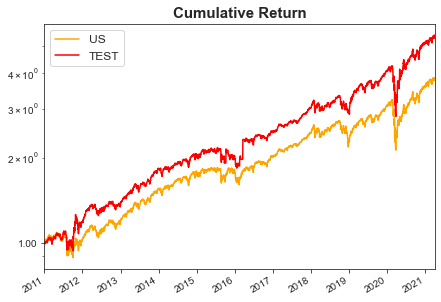

In [21]:
strats = ['US', 'DualMomentum']
names = ['US', 'TEST']
color = ['orange', 'r']

ufam.plot_cum(strats, names=names, color=color, logy=True);

In [22]:
ufam.get_stats()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
HighBeta,3.45,2579,12.77,27.00,0.47,-46.84,13.42,21.11,0.58,1.37,29.91,59.84,1.14,79.91
Quality,3.97,2579,14.31,16.91,0.85,-34.06,14.08,12.67,1.01,0.92,4.33,68.03,1.12,97.51
Momentum_EM,0.96,2579,-0.43,25.93,-0.02,-59.02,0.25,21.57,0.01,0.78,49.06,58.20,0.77,-32.32
ACWI,2.52,2579,9.40,17.46,0.54,-33.53,10.55,13.90,0.65,1.00,22.06,65.57,0.94,90.86
LowBeta,3.13,2579,11.69,16.01,0.73,-37.13,11.47,11.28,1.05,0.78,9.18,71.31,0.88,91.59
Growth,4.56,2579,15.85,17.70,0.90,-31.35,16.65,13.88,1.10,0.95,4.29,66.39,1.24,97.58
HighDvd,3.28,2579,12.20,17.10,0.71,-41.59,11.69,11.27,1.02,0.85,15.19,71.31,0.91,89.39
LowVol,3.20,2579,11.94,15.26,0.78,-36.26,12.87,10.91,1.17,0.74,11.63,64.75,1.30,96.45
DvdApprec,3.46,2579,12.79,15.90,0.80,-31.72,12.89,11.97,1.06,0.86,6.70,70.49,0.95,97.51
US,3.84,2579,13.95,17.09,0.82,-33.72,15.13,12.99,1.08,0.95,6.61,71.31,0.92,97.13


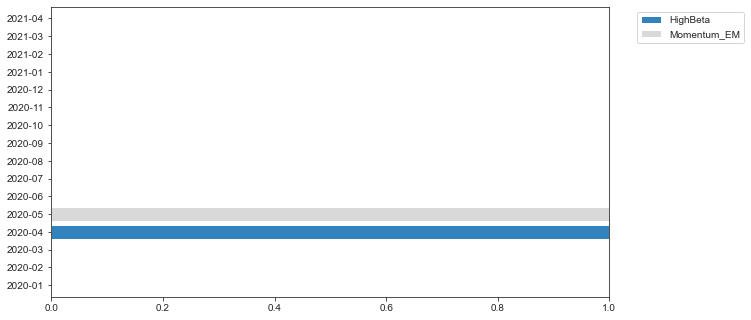

In [23]:
ufam.plot_weight([2020,2021]);

In [24]:
ufam.weight.iloc[-1][ufam.weight.iloc[-1]>0]

Quality    1.0
Name: 2021-03-30 00:00:00, dtype: float64

# US-DM-EM model

In [25]:
udem = q.Backtester(
    setting.base_params(db), 
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    assets=setting.assets_test_0, 
    sig_w_base=[1,0,0,0,0,0,0,0,0,0,0,0], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_n_sample= 21*6, 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    #follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='ACWI', #'BND_US_Long', 
    cash_equiv='ACWI', #'BND_US_Tbill', 
    start=start, 
    end=end 
)

  0%|          | 0/124 [00:00<?, ?it/s]

2.613600015640259


<Figure size 432x288 with 0 Axes>

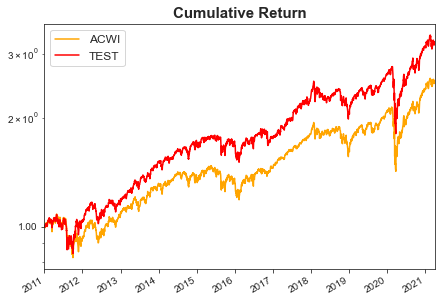

In [26]:
strats = ['ACWI', 'DualMomentum']
names = ['ACWI', 'TEST']
color = ['orange', 'r']

udem.plot_cum(strats, names=names, color=color, logy=True);

In [27]:
udem.get_stats()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Global,1.72,2579,5.38,18.53,0.29,-34.98,5.28,14.28,0.29,1.03,36.22,59.84,0.95,67.23
EM,1.37,2579,3.13,22.17,0.14,-38.20,2.32,19.20,0.12,1.13,43.30,50.82,1.20,-9.99
ACWI,2.52,2579,9.40,17.46,0.54,-33.53,10.55,13.90,0.65,1.00,22.06,65.57,0.94,90.86
US_Total,3.85,2579,13.96,17.48,0.80,-35.00,14.89,13.33,1.06,0.97,9.06,71.31,0.90,96.49
DualMomentum,3.23,2579,12.03,18.05,0.67,-34.69,12.30,15.13,0.74,0.99,13.65,67.21,0.97,94.84


In [28]:
udem.weight.tail()

,Global,EM,ACWI,US_Total
2020-11-30,0.0,0.0,0.0,1.0
2020-12-31,0.0,0.0,0.0,1.0
2021-01-29,0.0,1.0,0.0,0.0
2021-02-26,0.0,0.0,0.0,1.0
2021-03-30,0.0,0.0,0.0,1.0


# Global country 낙폭과대

In [29]:
usm = q.Backtester(
    setting.base_params(db),
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    assets=setting.assets_global_eq2, 
    sig_w_base=[-1,0,0,0,0,0,-1,0,0,0,0,1], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_n_sample= 21*6, 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    #follow_trend=(20,60), 
    #follow_trend_market=(20,60), 
    #follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='ACWI', #'BND_US_Long', 
    cash_equiv='ACWI', #'BND_US_Tbill', 
    start=start, 
    end=end
)

  0%|          | 0/124 [00:00<?, ?it/s]

2.8396809101104736


<Figure size 432x288 with 0 Axes>

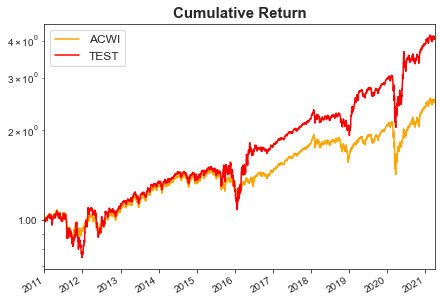

In [30]:
strats = ['ACWI', 'DualMomentum']
names = ['ACWI', 'TEST']
color = ['orange', 'r']

usm.plot_cum(strats, names=names, color=color, logy=True);

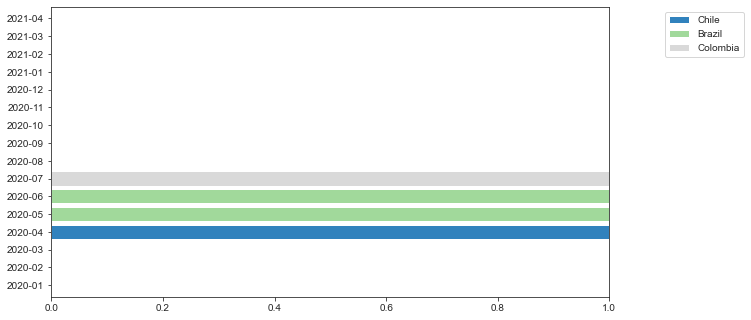

In [31]:
usm.plot_weight([2020,2021]);

In [32]:
usm.get_stats()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Argentina,0.95,2579,-0.50,28.69,-0.02,-61.68,3.20,25.30,0.11,1.08,47.42,54.92,0.93,-91.55
Spain,1.14,2579,1.32,26.68,0.05,-50.93,-4.64,22.93,-0.21,1.23,57.17,52.46,1.05,4.29
Belgium,2.09,2579,7.40,20.16,0.37,-42.80,6.08,16.19,0.40,0.97,30.94,59.02,1.03,76.24
Japan,1.86,2579,6.19,17.83,0.35,-30.69,6.69,16.11,0.38,0.81,32.66,59.84,0.98,75.95
ACWI,2.52,2579,9.40,17.46,0.54,-33.53,10.55,13.90,0.65,1.00,22.06,65.57,0.94,90.86
UK,1.34,2579,2.90,20.18,0.14,-43.33,0.20,14.85,0.01,1.05,49.61,59.84,0.84,15.34
Malaysia,0.92,2579,-0.84,18.69,-0.05,-50.30,0.63,16.60,0.03,0.76,48.33,50.82,1.00,11.90
Africa,0.82,2579,-1.91,20.70,-0.09,-59.35,-0.09,17.68,-0.01,0.85,50.30,50.82,0.99,23.67
Frontier,1.26,2579,2.26,14.90,0.15,-41.63,2.06,13.02,0.16,0.52,46.27,57.38,0.90,23.17
China_largecap,1.40,2579,3.32,24.53,0.14,-44.58,3.92,22.11,0.17,1.07,39.14,59.84,0.84,31.63


In [104]:
kfam = q.Backtester(
    setting.base_params(db_kr), 
    w_type='inv_ranky2', # adaptive로 하고, 종목을 selection에서 고르면 더 잘나옴
    rebal_style='cum', 
    n_picks=1, 
    assets=setting.assets_kr_factor2, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,1,0,0], 
    #sig_w_base=[1,0,0,0,0,0,1,0,0,1,2,3], 
    strong_condition=True, 
    market='K200', 
    supporter='KTB10YL',
    cash_equiv= 'KTB10Y',
    start=start, 
    end=end, 
)

  0%|          | 0/124 [00:00<?, ?it/s]

2.843557119369507


<Figure size 432x288 with 0 Axes>

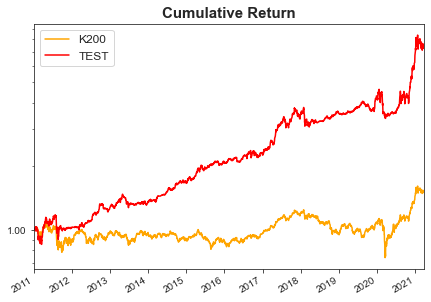

In [105]:
strats = ['K200', 'DualMomentum']
names = ['K200', 'TEST']
color = ['orange', 'r']

kfam.plot_cum(strats, names=names, color=color, logy=True);

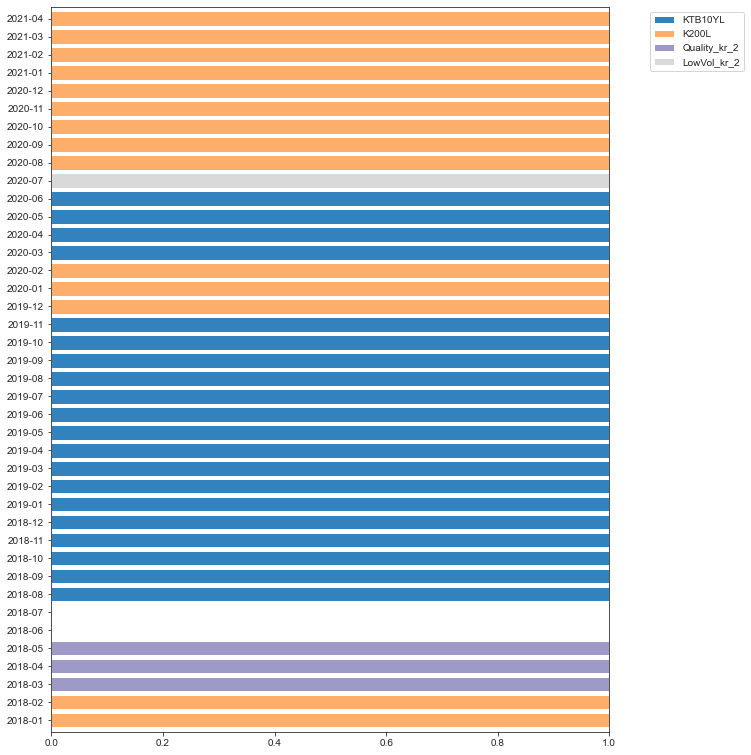

In [106]:
kfam.plot_weight([2018,2021]);

In [107]:
kfam.get_stats()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Contrarian_kr,1.28,2518,2.45,19.09,0.13,-54.12,1.27,15.68,0.07,NaN,47.03,59.84,0.81,13.52
Value_kr_2,1.92,2518,6.71,16.49,0.41,-63.78,9.30,13.83,0.73,NaN,33.94,49.18,1.19,12.30
KTB10Y,1.29,2518,2.54,4.79,0.53,-9.69,3.25,4.37,0.64,NaN,31.95,63.93,0.88,69.25
HighBeta_kr,1.80,2518,6.00,19.31,0.31,-45.83,-0.08,14.67,-0.01,NaN,50.20,55.74,1.10,25.96
DvdGrowth_kr,2.61,2518,10.00,16.68,0.60,-52.28,8.23,13.17,0.48,NaN,36.10,59.02,1.18,45.50
ESG_kr,1.30,2518,2.65,13.27,0.20,-53.10,0.00,10.72,0.10,NaN,41.43,48.36,0.90,11.68
MomentumGrowth_kr,1.40,2518,3.39,19.33,0.18,-55.49,0.05,15.53,0.00,NaN,49.89,54.92,1.04,-60.75
Quality_kr_2,2.64,2518,10.12,16.41,0.62,-53.08,10.96,14.29,0.72,NaN,35.43,57.38,0.97,62.30
LowVol_kr_2,1.78,2518,5.88,14.76,0.40,-41.08,4.94,11.82,0.40,NaN,29.44,54.92,1.22,74.43
HighDvd_kr,1.64,2518,5.05,13.77,0.37,-52.82,6.35,10.92,0.53,NaN,34.11,60.66,0.92,58.98
